In [72]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [73]:
X = load_boston().data
Y = load_boston().target

In [74]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [75]:
clf = SGDRegressor()
clf.fit(X, Y)
mse_1 = mean_squared_error(Y, clf.predict(X))
print(mse_1)

22.02036094695328


Text(0.5, 1.0, 'our regressor')

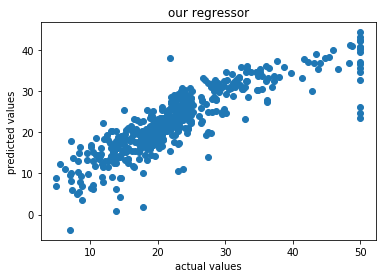

In [76]:
plt.scatter(Y, clf.predict(X))
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("our regressor")

In [77]:
weights_reg = clf.coef_
weights_reg = weights_reg[:,np.newaxis]
weights_reg

array([[-0.84447764],
       [ 0.95318659],
       [-0.13056541],
       [ 0.75252507],
       [-1.83375136],
       [ 2.7678446 ],
       [-0.04149944],
       [-3.01385461],
       [ 1.91604731],
       [-1.22232138],
       [-2.00044335],
       [ 0.81816143],
       [-3.66586143]])

In [78]:
w_new = np.random.normal(0,1,13)[:,np.newaxis]
print(w_new.shape)

b = np.random.normal(0,1,1)[:,np.newaxis]
print(b.shape)

print(X.shape)

Y=Y[:,np.newaxis]
print(Y.shape)

(13, 1)
(1, 1)
(506, 13)
(506, 1)


In [79]:
#checking

r1 = np.dot(X,w_new) +b
print(r1.shape)

r2 = Y-r1
print(r2.shape)

r3= r2*X
print(r3.shape)

r4 = np.sum(r3, axis = 0)[:,np.newaxis]
print(r4.shape)

dw= (-2/506)*r4
print(dw.shape)

db= (-2/506)*r3
print(db.shape)

(506, 1)
(506, 1)
(506, 13)
(13, 1)
(13, 1)
(506, 13)


In [80]:
w_old = 0
w_new = np.random.normal(0,1,13)[:,np.newaxis]  #(13,1)

b = np.random.normal(0,1,1)[:,np.newaxis]   #(1,1)

#precision = 0.001

r=0.01
#while abs(w_new - w_old).all() > precision:
for i in range(1000):
    w_old = w_new
    
    r1 = np.dot(X,w_new) + b   #(506,1)
    r2 = Y-r1 #(506,1)
    
    r3= r2*X #(506,13)
    
    r4 = np.sum(r3, axis = 0)[:,np.newaxis] #(1,13)
    
    dw= (-2/506)*r4   #(13,1)
    
    r5 = np.sum(r2)
    db= (-2/506)*r5 #(1,1)----sum
    
    w_new = w_new - r* dw #(13,1)
    b = b - r*db #(1,1)
    
    #r=r/2
    #checking mse at each iteration
    y_predict = np.dot(X,w_new) + b
    print(mean_squared_error(Y, y_predict))
    
    

487.0998014855741
465.325768027591
445.18920160783426
426.4487528109708
408.91312046230104
392.4297609982083
376.8761861351402
362.1532537612229
348.1799938606423
334.8896166758464
322.226431461215
310.14346666213373
298.600630460197
287.56328766525155
277.0011574541782
266.88745841494796
257.1982442618652
247.91188660609748
239.0086711892939
230.4704817062179
222.28055128524366
214.42326627168634
206.8840104826716
199.64904081569756
192.70538718259564
186.0407713497791
179.6435405049673
173.50261232508402
167.60742905523927
161.94791867506802
156.51446166503797
151.2978622215602
146.28932302885912
141.4804228953087
136.86309671597107
132.42961734188586
128.1725790283513
124.08488220523675
120.15971936707291
116.39056192297109
112.77114787917363
109.29547025242401
105.95776613205382
102.7525063240137
99.67438552202871
96.71831296040416
93.87940351033981
91.15296918738764
88.53451104226062
86.01971141084128
83.60442650215661
81.28467930544319
79.05665279934654
76.91668344787703
74.86125

22.54406452613274
22.542042194741477
22.540027686258256
22.538020961233098
22.536021980464756
22.53403070499877
22.532047096125584
22.53007111537868
22.52810272453273
22.52614188560175
22.5241885608373
22.522242712726698
22.520304303991214
22.51837329758434
22.516449656690032
22.51453334472101
22.512624325317013
22.51072256234316
22.508828019888224
22.506940662263023
22.505060453998745
22.50318735984534
22.50132134476991
22.499462373955115
22.497610412797563
22.495765426906324
22.493927382101283
22.49209624441168
22.490271980074553
22.488454555533238
22.486643937435872
22.48484009263393
22.483042988180742
22.481252591330033
22.47946886953451
22.477691790444414
22.47592132190611
22.47415743196069
22.47240008884256
22.470649260978114
22.468904916984304
22.46716702566734
22.465435556021315
22.463710477226897
22.461991758649976
22.460279369840404
22.458573280530658
22.456873460634576
22.45517988024608
22.453492509637897
22.451811319260326
22.450136279739986
22.44846736187858
22.44680453665

In [81]:
#we can see that mse reduces at each step

In [82]:
y_predict = np.dot(X,w_new) + b

In [83]:
y_predict.shape

(506, 1)

In [84]:
mse_2 = mean_squared_error(Y, y_predict)
print(mse_2)

22.051469716726757


Text(0.5, 1.0, 'our regressor')

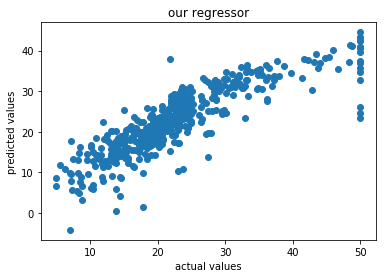

In [85]:
plt.scatter(Y, y_predict)
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("our regressor")

In [86]:
# a almost linear plot can be observed here

In [87]:
w_new

array([[-0.84120717],
       [ 0.93216215],
       [-0.23990033],
       [ 0.73640588],
       [-1.92836035],
       [ 2.75229386],
       [-0.02399253],
       [-3.05129042],
       [ 1.6624121 ],
       [-0.96414491],
       [-2.01816278],
       [ 0.84393727],
       [-3.72315656]])

In [89]:
from prettytable import PrettyTable

x= PrettyTable()
x.field_names = ['model', 'weights', 'MSE']
x.add_row(['SGDReggressor',weights_reg, mse_1])
x.add_row(['Custom implementation of SGDReggressor', w_new, mse_2])

In [90]:
print(x)

+----------------------------------------+-----------------+--------------------+
|                 model                  |     weights     |        MSE         |
+----------------------------------------+-----------------+--------------------+
|             SGDReggressor              |  [[-0.84447764] | 22.02036094695328  |
|                                        |   [ 0.95318659] |                    |
|                                        |   [-0.13056541] |                    |
|                                        |   [ 0.75252507] |                    |
|                                        |   [-1.83375136] |                    |
|                                        |   [ 2.7678446 ] |                    |
|                                        |   [-0.04149944] |                    |
|                                        |   [-3.01385461] |                    |
|                                        |   [ 1.91604731] |                    |
|               